In [1]:
from function import readPoints, humanTime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import time


In [2]:
data = readPoints('18_02_2022.csv')

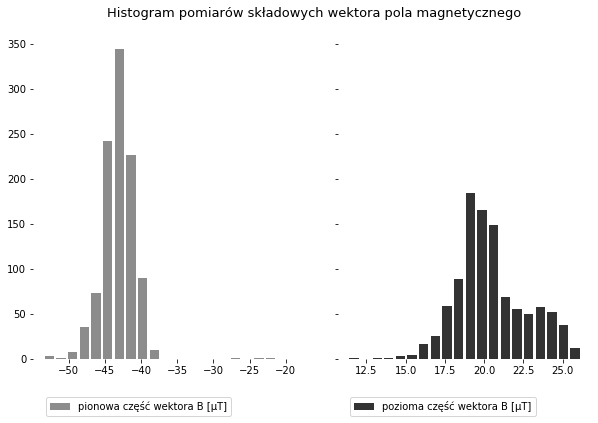

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=(10, 6))
plt.text(-4,380,'Histogram pomiarów składowych wektora pola magnetycznego', fontsize = 13)

ax[0].hist(data['data_measured'][8],bins=20, rwidth=0.8, density=False, color='gray', alpha=0.9, label = 'pionowa część wektora B [μT]')
ax[1].hist(data['data_measured'][10],bins=20, rwidth=0.8 ,density=False, color = 'black', alpha=0.8, label = 'pozioma część wektora B [μT]')

for pos in ['right', 'top', 'bottom', 'left']:
    ax[0].spines[pos].set_visible(False)
    ax[1].spines[pos].set_visible(False)

ax[0].legend(bbox_to_anchor=(0.8, -0.1))
ax[1].legend(bbox_to_anchor=(0.8, -0.1))



Text(0.5, 1.0, 'Rozkład wartości pionowej składowej wektora B $[\\mu T]$ względem długości geograficznej $[\\degree]$')

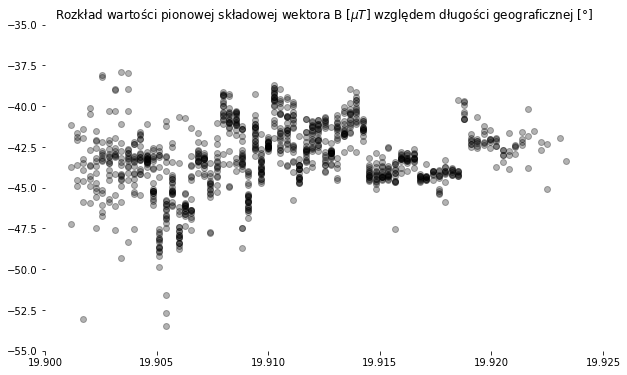

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(data['data_measured'][4],data['data_measured'][8],color = 'black', alpha=0.3)
plt.ylim(-55,-35)
plt.xlim(19.9,19.925)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.title('Rozkład wartości pionowej składowej wektora B $[\mu T]$ względem długości geograficznej $[\degree]$')

Text(0.5, 1.0, 'Rozkład wartości pionowej składowej wektora B $[\\mu T]$ względem szerokości geograficznej $[\\degree]$')

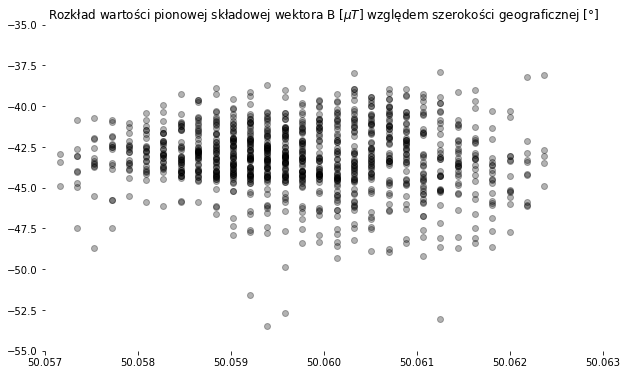

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(data['data_measured'][5],data['data_measured'][8],color = 'black', alpha=0.3)
plt.ylim(-55,-35)
plt.xlim(50.057,50.063)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.title('Rozkład wartości pionowej składowej wektora B $[\mu T]$ względem szerokości geograficznej $[\degree]$')

Text(0.5, 1.0, 'Rozkład wartości poziomej składowej wektora B $[\\mu T]$ względem długości geograficznej $[\\degree]$')

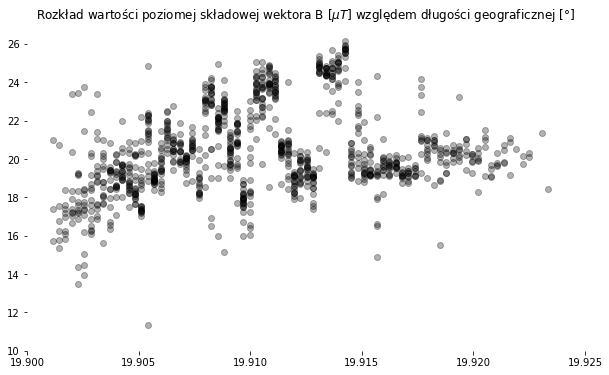

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(data['data_measured'][4],data['data_measured'][10],color = 'black', alpha=0.3)
plt.ylim(10,27)
plt.xlim(19.9,19.925)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.title('Rozkład wartości poziomej składowej wektora B $[\mu T]$ względem długości geograficznej $[\degree]$')

Text(0.5, 1.0, 'Rozkład wartości poziomej składowej wektora B $[\\mu T]$ względem szerokości geograficznej $[\\degree]$')

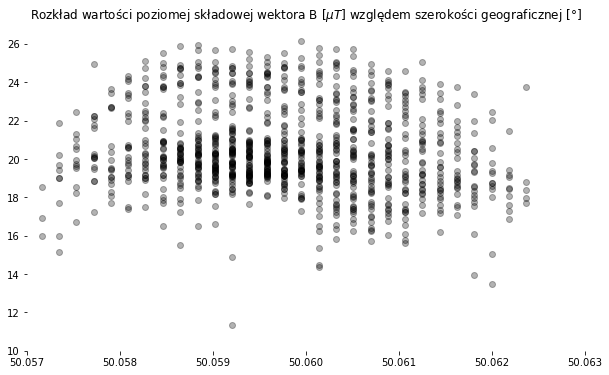

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(data['data_measured'][5],data['data_measured'][10],color = 'black', alpha=0.3)
plt.ylim(10,27)
plt.xlim(50.057,50.063)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.title('Rozkład wartości poziomej składowej wektora B $[\mu T]$ względem szerokości geograficznej $[\degree]$')

In [8]:
df = pd.DataFrame(np.array(data['data_measured']).T, columns = data['header'])
grouped = df.groupby(df.id_user)
Adam = grouped.get_group('AdamNaFonieJacka')

jasiek_1 = grouped.get_group('User_1')
jasiek_2 = grouped.get_group('User_2')
jasiek_3 = grouped.get_group('Johnny_2')
jasiek = jasiek_1.append(jasiek_2,ignore_index = True).append(jasiek_3,ignore_index=True)

print('Ilość zmierzonych punktów:')
print('Adam: ', len(Adam))
print('Jasiek: ', len(jasiek_1) + len(jasiek_2) + len(jasiek_3))
print()

jasiek_num_hor = pd.to_numeric(jasiek['mean_horizontal'])
Adam_num_hor = pd.to_numeric(Adam['mean_horizontal'])
jasiek_num_ver = pd.to_numeric(jasiek['mean_vertical'])
Adam_num_ver = pd.to_numeric(Adam['mean_vertical'])

print('średnia wartośc pozioma:')
print('Jasiek: ', jasiek_num_hor.mean())
print('Adam: ', Adam_num_hor.mean())
print()

print('średnia wartość pionowa:')
print('Jasiek: ', jasiek_num_ver.mean())
print('Adam: ', Adam_num_ver.mean())




Ilość zmierzonych punktów:
Adam:  307
Jasiek:  731

średnia wartośc pozioma:
Jasiek:  20.678044719562244
Adam:  19.842301986970682

średnia wartość pionowa:
Jasiek:  -43.04406905608756
Adam:  -43.27245908794788


In [23]:
measure_time = []
ten_min = 1/6
min = 1/60
ten_sec = 1/360
sec = 1/3600
human = [time.strftime("%H%M%S", time.localtime(i)) for i in data['data_measured'][3]]
for hour in human:
    temp = int(hour[0])*10 + int(hour[1]) + int(hour[2])*ten_min + int(hour[3])*min + int(hour[4])*ten_sec + int(hour[5])*sec
    measure_time.append(temp)

Text(0.5, 1.0, 'Rozkład wartości pionowej składowej wektora B $[\\mu T]$ względem czasu pomiaru [h]')

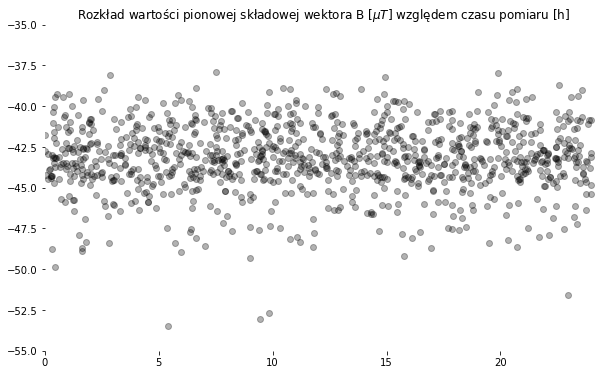

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(measure_time,data['data_measured'][8],color = 'black', alpha=0.3)
plt.ylim(-55,-35)
plt.xlim(0,24.5)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.title('Rozkład wartości pionowej składowej wektora B $[\mu T]$ względem czasu pomiaru [h]')

Text(0.5, 1.0, 'Rozkład wartości poziomej składowej wektora B $[\\mu T]$ względem czasu pomiaru [h]')

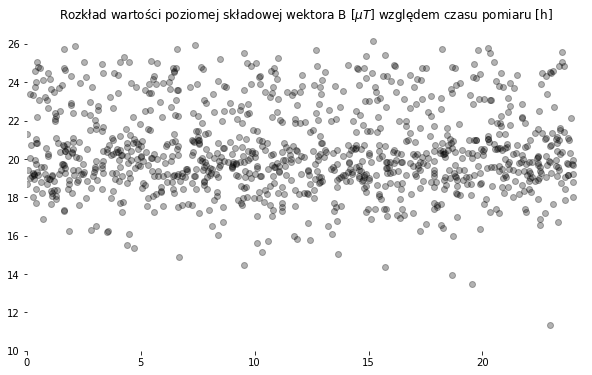

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(measure_time,data['data_measured'][10],color = 'black', alpha=0.3)
plt.ylim(10,27)
plt.xlim(0,24.5)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.title('Rozkład wartości poziomej składowej wektora B $[\mu T]$ względem czasu pomiaru [h]')

In [21]:

hour_from_zero = []
ten_min = 1/6
min = 1/60
ten_sec = 1/360
sec = 1/3600
human = [time.strftime("%H%M%S", time.localtime(i)) for i in data['data_measured'][3]]
for hour in human:
    temp = int(hour[0])*10 + int(hour[1]) + int(hour[2])*ten_min + int(hour[3])*min + int(hour[4])*ten_sec + int(hour[5])*sec
    hour_from_zero.append(temp)
hour_from_zero

[16.42694444444444,
 7.967222222222222,
 1.9874999999999998,
 18.33861111111111,
 21.916666666666664,
 5.966666666666667,
 20.048611111111114,
 3.722222222222222,
 12.391111111111114,
 20.282222222222224,
 4.065277777777778,
 17.383333333333333,
 23.00611111111111,
 15.125,
 18.156388888888888,
 10.11361111111111,
 3.2977777777777777,
 21.59722222222222,
 12.899444444444446,
 7.329444444444445,
 22.81888888888889,
 21.174722222222226,
 23.804166666666667,
 7.496944444444445,
 23.41611111111111,
 21.878611111111113,
 5.972222222222222,
 18.64222222222222,
 15.46638888888889,
 5.104166666666667,
 14.908333333333333,
 11.348611111111111,
 10.005,
 17.125555555555554,
 3.351388888888889,
 22.976388888888888,
 23.014444444444443,
 9.02277777777778,
 15.600555555555555,
 20.508055555555558,
 9.620000000000001,
 22.759999999999998,
 21.737222222222222,
 9.693333333333333,
 2.0380555555555553,
 3.6377777777777776,
 14.670833333333333,
 5.010555555555556,
 20.0375,
 5.004444444444445,
 17.86972